# 1. Business Understanding
**Objective:** Develop a robust machine learning model that can accurately classify handwritten digits (0-9), despite variations in handwriting styles.

**Challenges:** High intra-class variance due to different writing styles, potential noise in images, and class imbalance.

**Success Criteria:** Model performance will be evaluated based on accuracy, precision, recall, and robustness to difficult cases.

# 2. Data Understanding
**Dataset:** The MNIST dataset, containing 70,000 gray scale images (60,000 for training, 10,000 for testing), each sized 28x28 pixels.
## Feature Considerations:
- Presence of closed loops (e.g., 0, 6, 8)
- Stroke thickness variation
- Aspect ratios and curvatures (e.g., distinguishing 1 from 7)
- Edge detection and texture information

# 3. Data Preparation

In [56]:
import numpy as np
dataArrays = np.load("Imports/mnist_combined.npz")

dataImages = dataArrays['images']
dataLables = dataArrays['labels']

# we should have 70K images with an with and height of 28 pixels.
print ("loaded dataset from file. Shape of Images data set:", dataImages.shape)

loaded dataset from file. Shape of Images data set: (70000, 28, 28)



## Preprocessing Steps:
- Normalize pixel values (0-255 → 0-1)
- Apply data augmentation (rotation, shifting, noise addition) to improve generalization


In [57]:
import cv2

def Preprocess_image(img):
    "Preprocess image: Normalize, remove noise, and binarize."
    img = img / 255.0  # Normalize pixel values to range [0,1] for consistency across models.
    img = cv2.GaussianBlur(img, (3, 3), 0)  # Apply Gaussian blur to reduce small noise artifacts. (3,3): Ksize need to be tested. IMPORTANT!!! keep these numbers odd and grater than or equal to 0
    ret, img = cv2.threshold(img, 0.5, 1.0, cv2.THRESH_BINARY)  # Convert to binary format to simplify features. [2]
    print(ret)
    return img

### Explanation of above
Each pixel in the image is not in a binary state, they are on a gray scale which value can range from 0 to 255. So we first normalize every pixel to be a value of 0 or 1, which helps clean up the images a little.

The result of this can cause the image is not most likely very noisy. So a GaussianBlur is applied to "smooths" out the image high frequency components and acts as a low-pass filter, with the goal of preserving the edges and boundaries of the number inside the image [1]. Or to but it another way: After we have applied the GaussianBlur, the hope is that there is only one connected set of pixels that make up the number inside the image, an there should be no orphans or single islands else where.

Finally, we can use Binarization [2] to simplify features extraction later by highlighting digit strokes clearly. 

- Use edge-detection filters (e.g., Sobel, Laplacian) to extract features
- Principal Component Analysis (PCA) for dimensionality reduction
- Convert images into numerical feature vectors for models that require structured input

### Explanation of above

### Running the code

0.5


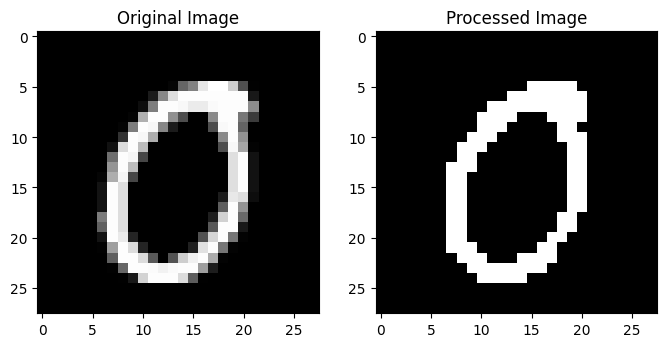

Extracted feature vector shape:


In [66]:
import matplotlib.pyplot as plt

image_sample = np.random.randint(0,len(dataImages))
image_original = dataImages[image_sample].reshape(28,28)

image_processed = Preprocess_image(image_original)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(image_processed, cmap='gray')
plt.title("Processed Image")
plt.show()

print("Extracted feature vector shape:", )

# 4. Modeling
**Baseline Model:** Logistic Regression or k-NN for quick benchmarking.

## ML Approaches:
- Support Vector Machine (SVM) with HOG features
- Random Forest or XGBoost on extracted features

# 5. Evaluation
**Metrics:**
- Accuracy (primary metric)
- Confusion Matrix to analyze misclassifications
- Precision, Recall, F1-score for class-specific performance
- Robustness Testing:
- Evaluate on distorted and rotated images
- Assess performance on ambiguous samples

# 6. References
[1]“Gaussian Blur - an overview | ScienceDirect Topics,” www.sciencedirect.com. https://www.sciencedirect.com/topics/engineering/gaussian-blur

[2]“Python | Thresholding techniques using OpenCV | Set-1 (Simple Thresholding) - GeeksforGeeks,” GeeksforGeeks, May 06, 2019. https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/
‌

[3]F. Daghero, D. J. Pagliari, and M. Poncino, “Energy-efficient deep learning inference on edge devices,” Advances in Computers, pp. 247–301, 2021, doi: https://doi.org/10.1016/bs.adcom.2020.07.002.
‌